Based on 6 detector signals, I intend to distinguish between four different types of particles, including positrons, pions, kaons, and protons, using a neural network model and classical machine learning algorithms, but before doing so, I would like to briefly explain these particles:

*   The **positron** or antielectron is the antiparticle or the antimatter counterpart of the electron. It has an electric charge of +1e, a spin of 1/2 (the same as the electron), and the same mass as an electron.

*   The **pion** consists of a quark and an antiquark and is therefore a meson, and they are the lightest mesons and, more generally, the lightest hadrons.


*   In particle physics, the **kaon** also called a K meson is any of a group of four mesons distinguished by a quantum number called strangeness. In the quark model, they are understood to be bound states of a strange quark (or antiquark) and an up or down antiquark (or quark).


*   The **proton** is a stable subatomic particle with a positive electric charge of +1e elementary charge. Its mass is slightly less than that of a neutron and 1,836 times the mass of an electron. One or more protons are present in the nucleus of every atom. They provide the attractive electrostatic central force which binds the atomic electrons.

**About Dataset** : A somewhat simplified dataset of a GEANT based simulation of electron-proton inelastic scattering measured by a particle detector system. The dataset contains 5,000,000 records. The distribution of particles within dataset are:


*   The **pion** 56.14 % or 2,806,833
*   The **proton** 38.92 % or 1,945,849


*   The **kaon** 4.65 % or 232,471
*   The **positron** 0.30 % or 14,847

As can be seen, there is an unequal distribution of targets(classes) in the dataset, so data has imbalanced classes, which brings challenges to feature correlation, class separation and evaluation, and results in poor model performance. I change the dataset that I use to build my predictive model to have more balanced data. This change is called sampling my dataset. I first separate the dataset for each class, resulting in four subsets: one for the positron class with 14,847 records, one for the kaon class with 232,471 records, one for the proton class with 1,945,849 records, and one for the pion class with 2,806,833 records. For each subset, with the sample() method, I generate a random sample of rows, where the number of random rows equals the number of positrons. Then, I merge these four subsets.



**The features of the dataset are as follows:**

1) id: particle type (0 --> positron; 1 --> pion; 2 --> kaon; 3 --> proton)

2) p: momentum (GeV/c). 

3) theta (rad). 

4) beta.

5) nphe: number of photoelectrons.

6) ein: 	inner energy (GeV).

7) eout: outer energy (GeV). 




Source: [kaggle](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses)

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import libraries
import numpy as np
import scipy.optimize as opt
import re, seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

# Read data using pandas

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ParticleIdentification.zip') 
df.id = df.id.map({-11: 0, 211: 1, 321: 2, 2212: 3})
df.head() 

id         p     theta      beta  nphe       ein      eout
0   1  0.780041  1.081480  0.989962     0  0.000000  0.000000
1   1  0.260929  0.778892  0.902450     0  0.000000  0.000000
2   3  0.773022  0.185953  0.642428     4  0.101900  0.000000
3   1  0.476997  0.445561  0.951471     0  0.000000  0.000000
4   3  2.123290  0.337332  0.908652     0  0.034379  0.049256

# Pie chart

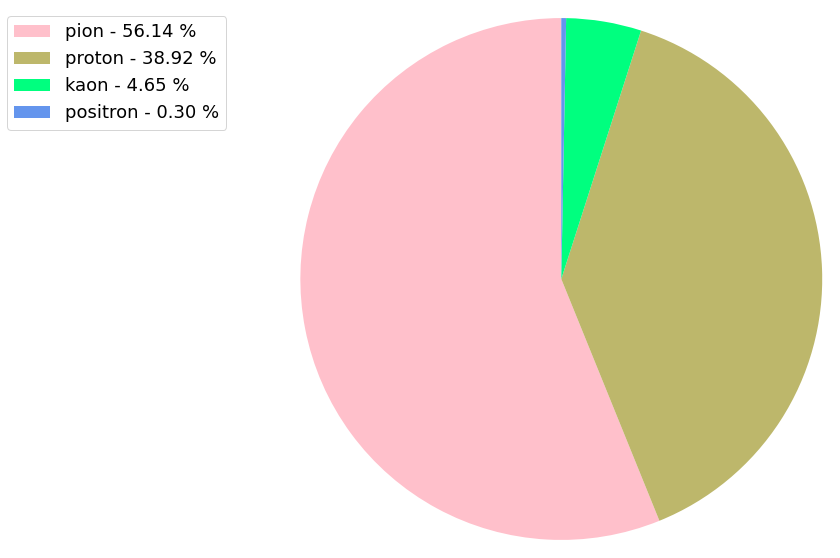

In [ ]:
plt.figure(figsize=(10, 10))
x = np.char.array(['pion','proton','kaon','positron'])
y = np.array([2806833, 1945849, 232471, 14847]) 
colors = ['pink','darkkhaki','springgreen','cornflowerblue']
percent = 100.*y/y.sum()
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                           key=lambda x: x[2],
                                           reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=18)

plt.savefig('piechart.png', bbox_inches='tight')

**As can be seen, there is an unequal distribution of targets(classes) in the dataset, so data has imbalanced classes.**

# The subset represents the pion class 

In [ ]:
df_pion = df[df.id == 1]
df_pion = df_pion.sample(14847, random_state=42) 
df_pion.head() 

id         p     theta      beta  nphe       ein      eout
3938363   1  0.529641  1.059390  0.954406     0  0.000000  0.000000
435820    1  1.395130  0.475646  0.983918     0  0.026184  0.250904
4901991   1  0.999008  0.595891  0.987859     0  0.044907  0.060517
816394    1  0.576181  1.017160  0.948245     0  0.000000  0.000000
2731939   1  2.471960  0.222084  0.991033     0  0.037949  0.109636

# The subset represents the proton class 

In [ ]:
df_proton = df[df.id == 3]
df_proton = df_proton.sample(14847, random_state=42) 
df_proton.head() 

id         p     theta      beta  nphe       ein      eout
2324413   3  1.239950  0.463639  0.799720     0  0.363058  0.240742
4542453   3  2.130620  0.391129  0.897233     0  0.033509  0.217487
2334359   3  2.422670  0.175407  0.938310     0  0.000000  0.494072
1482381   3  0.764782  0.382142  0.625098     0  0.096635  0.000000
4725123   3  1.049210  0.553735  0.737650     0  0.181598  0.000000

# The subset represents the kaon class 

In [ ]:
df_kaon = df[df.id == 2]
df_kaon = df_kaon.sample(14847, random_state=42) 
df_kaon.head() 

id         p     theta      beta  nphe       ein      eout
4390272   2  2.329750  0.310478  0.995775     0  0.035157  0.047242
1463357   2  1.683530  0.325647  0.974504     0  0.135409  0.023392
4110518   2  0.807050  0.417519  1.169880    15  0.000000  0.000000
3105131   2  1.580830  0.285884  0.963093     0  0.107805  0.080796
1925808   2  0.978714  0.315651  0.908744     0  0.024674  0.056809

# The subset represents the positron class

In [ ]:
df_positron = df[df.id == 0]
df_positron.head() 

id         p     theta      beta  nphe       ein      eout
143    0  0.965438  0.175186  0.999518    16  0.226139  0.000000
279    0  1.430840  0.266338  1.000610    53  0.260426  0.056901
1374   0  0.315557  0.222151  0.997282     0  0.000000  0.000000
1916   0  0.885481  0.782970  1.001940     0  0.000000  0.000000
1964   0  0.698711  0.329893  0.996576    39  0.120439  0.000000

# Combining four datasets with `concat()`

In [ ]:
frames = [df_pion, df_proton, df_kaon, df_positron]  
result = pd.concat(frames)
df = result.sample(59388, random_state=42) 
df = df.reset_index(drop=True)
df.head(10) 

id         p     theta      beta  nphe       ein      eout
0   1  1.042800  0.298184  1.001500     0  0.085145  0.081895
1   0  0.305638  0.481411  0.997903     0  0.000000  0.000000
2   2  1.317310  0.499347  0.951465     0  0.033143  0.051545
3   1  2.817430  0.397210  0.986659     0  0.038498  0.036438
4   1  0.460517  1.130720  0.966259     0  0.000000  0.000000
5   0  0.312505  0.442863  1.000200     0  0.000000  0.000000
6   0  0.595560  0.280667  0.996825    81  0.070176  0.000000
7   0  0.443580  0.283000  1.010210     0  0.000000  0.000000
8   3  2.702530  0.350316  0.950675     0  0.041428  0.042710
9   1  0.519265  1.439200  0.943388     0  0.000000  0.000000

# In order to work with DataFrame, I need to know what type of data I am working with. I check that by using the `dtypes`.

In [ ]:
df.dtypes

id         int64
p        float64
theta    float64
beta     float64
nphe       int64
ein      float64
eout     float64
dtype: object

# The DataFrame contains 59,388 records with 7 columns.

In [ ]:
df.shape

(59388, 7)

# Testing DataFrame for NaN values

In [ ]:
df.isnull().any().any()

False

## It does not contain any NaN values

# Correlation heatmap

**With `Seaborn's heatmap()` function, I can determine which pairs of variables are most closely related.**

Correlation is a statistical measure that expresses the strength of the relationship between two variables. The two main types of correlation are positive and negative. Positive correlation occurs when two variables move in the same direction; as one increases, so do the other. A negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases. Here, there is a strong positive correlation between id(or particle type) and beta.

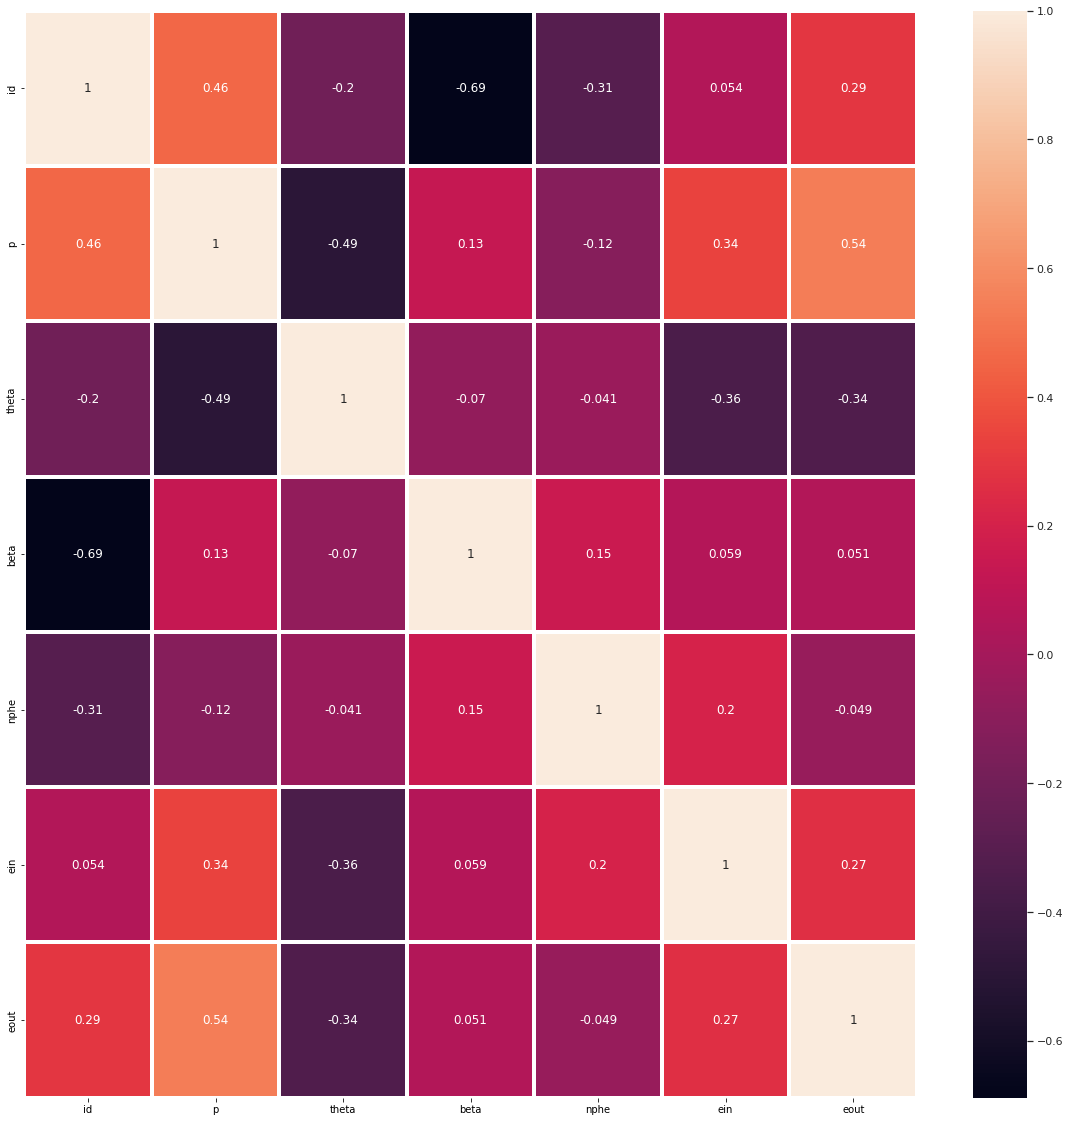

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.set(font_scale=1.0)
sns.heatmap(df.corr() , annot= True, linewidths=3, ax=ax)

# Data Visualization and Analysis:

<Figure size 1440x720 with 0 Axes>

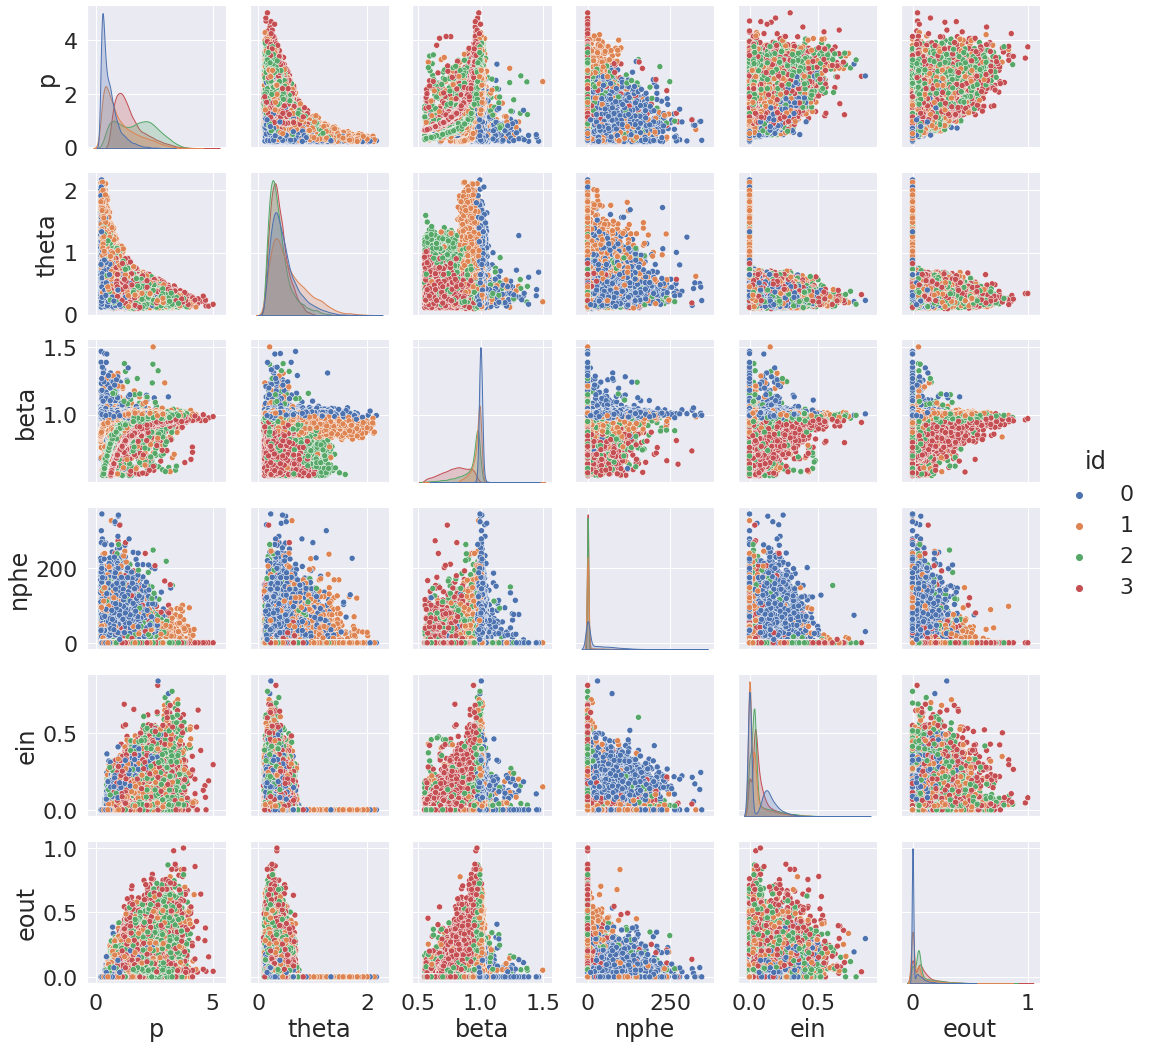

In [ ]:
df1 = df[['p', 'theta', 'beta', 'nphe', 'ein', 'eout', 'id']]
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
sns.pairplot(df1, hue="id", palette="deep")

By default, this function will create a grid of Axes such that each numeric variable in df1 will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. source : [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

# Histogram

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins. source : [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

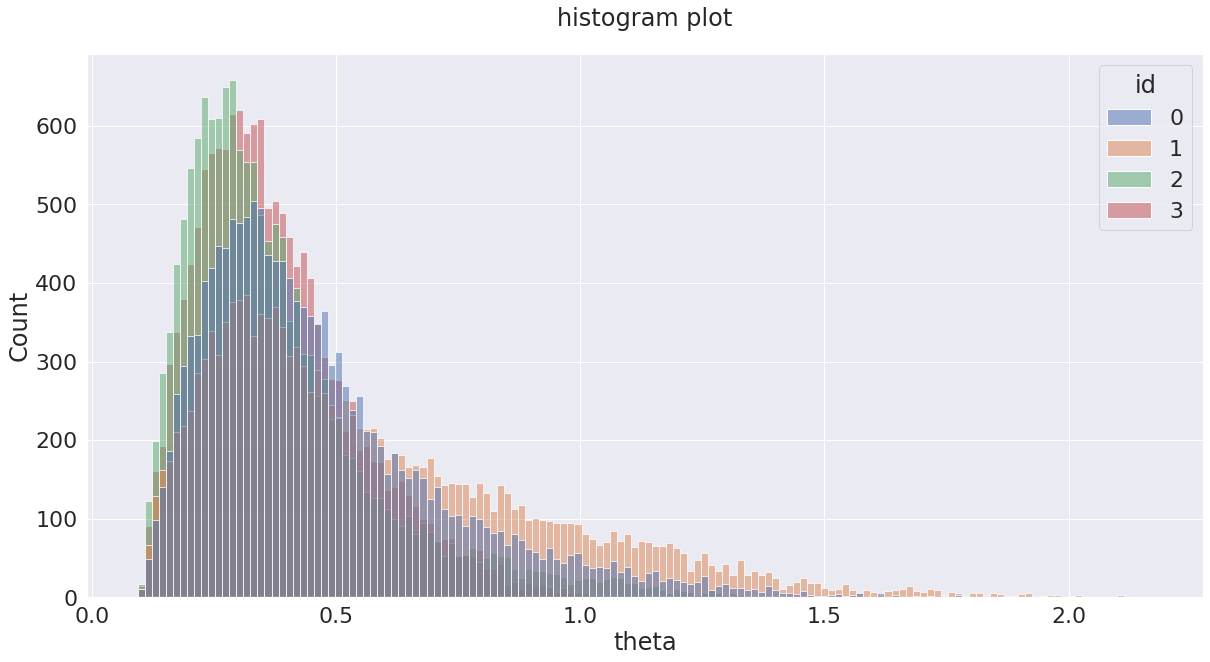

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("histogram plot", y=1.04)
sns.histplot(data=df, x="theta", hue="id", palette="deep")

# kdeplot

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. source : [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) 

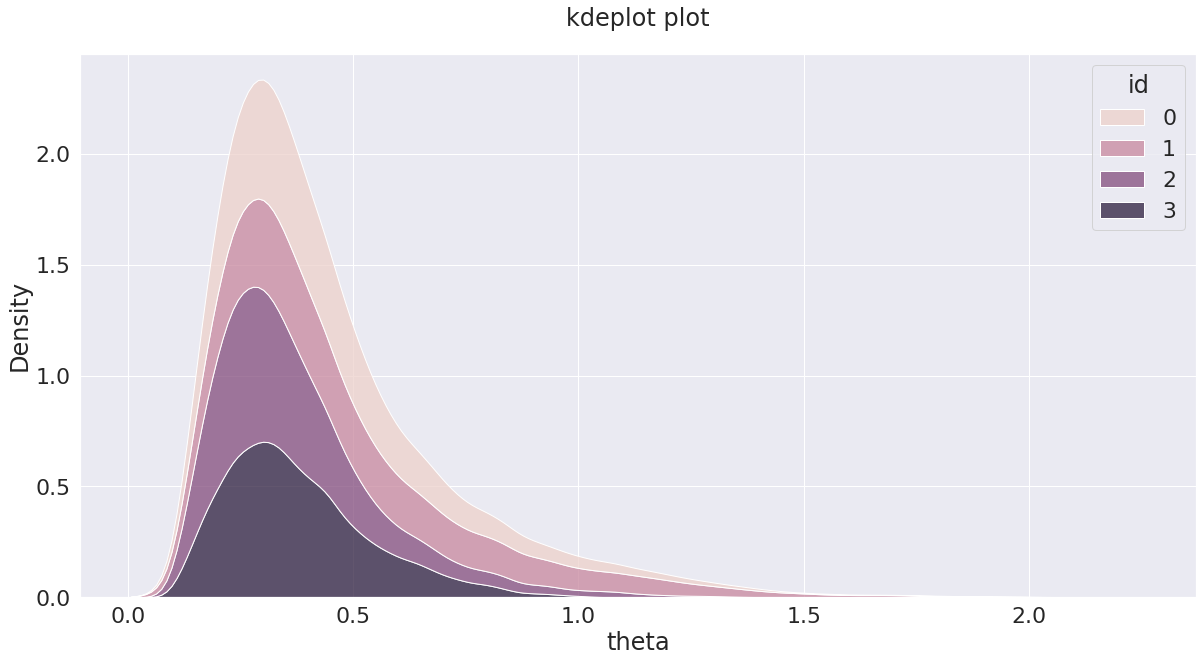

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("kdeplot plot", y=1.04)
sns.kdeplot(data=df, x="theta", hue="id", multiple="stack")

# Scatter plots in 2D


## 1. `p` vs `beta`

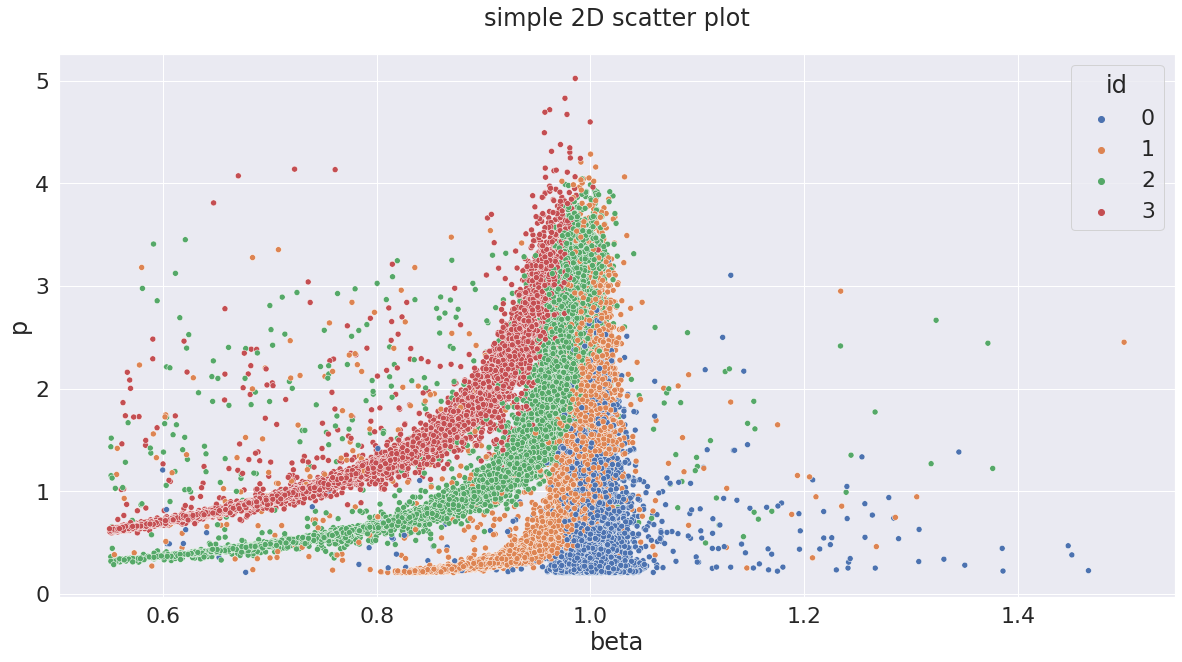

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='beta', y='p', hue='id', palette="deep")

## 2. `theta` vs `beta` 

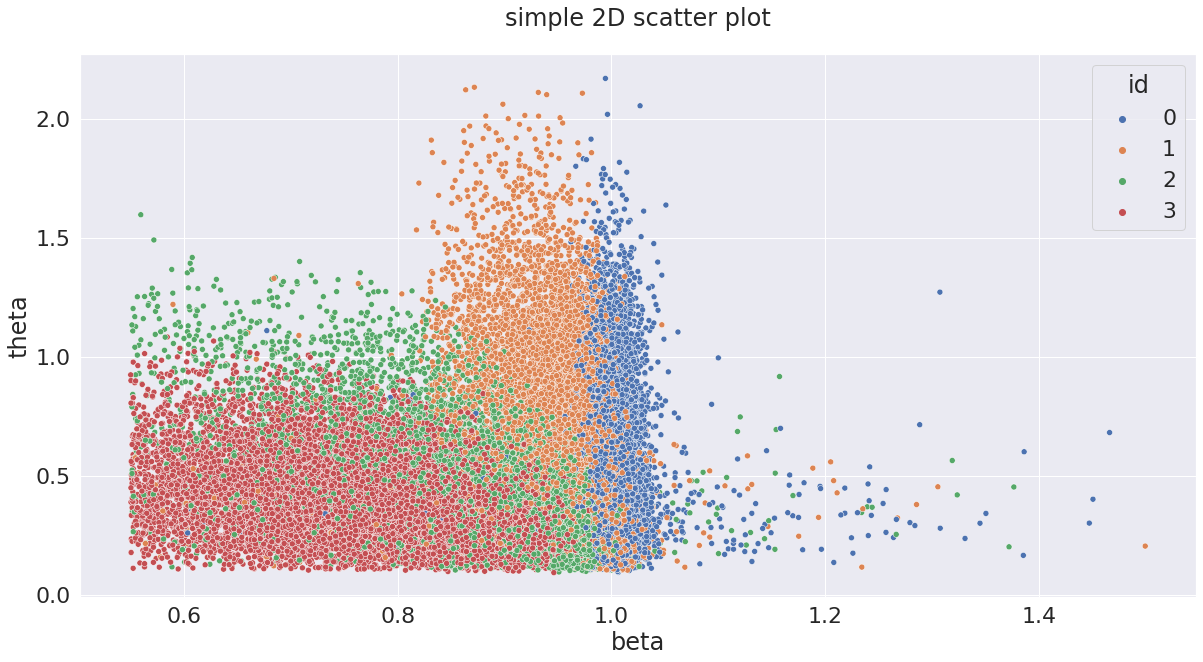

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='beta', y='theta', hue='id', palette="deep")

## 3. `p` vs `theta`



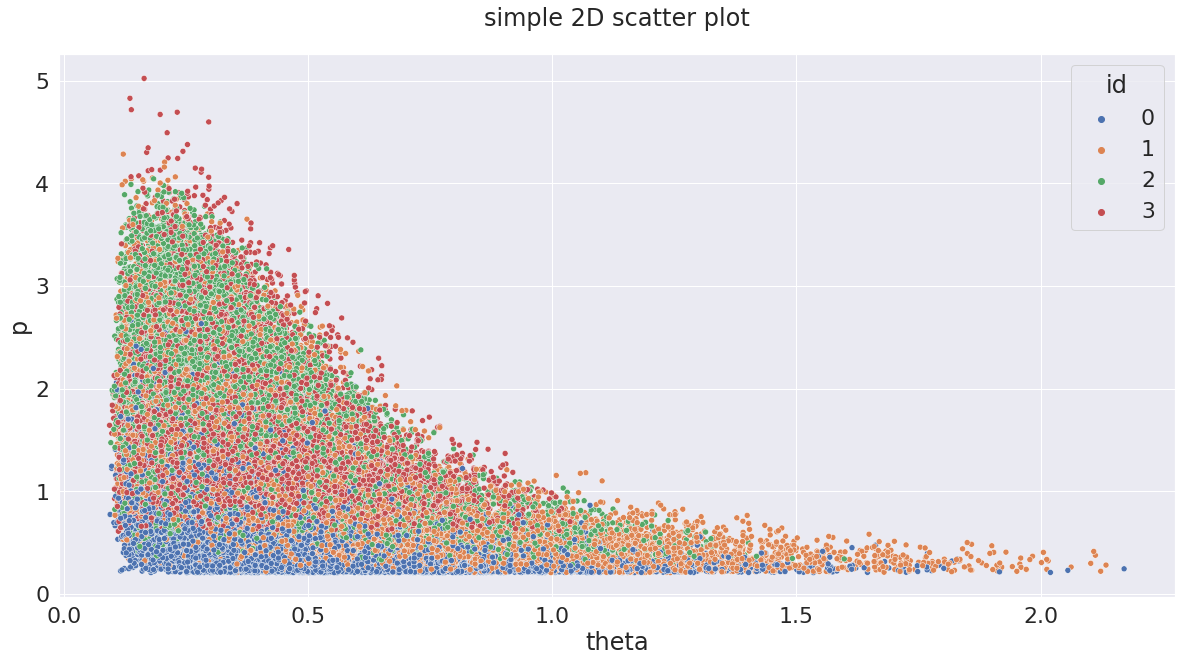

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='theta', y='p', hue='id', palette="deep")

## 4. `beta` vs `ein`

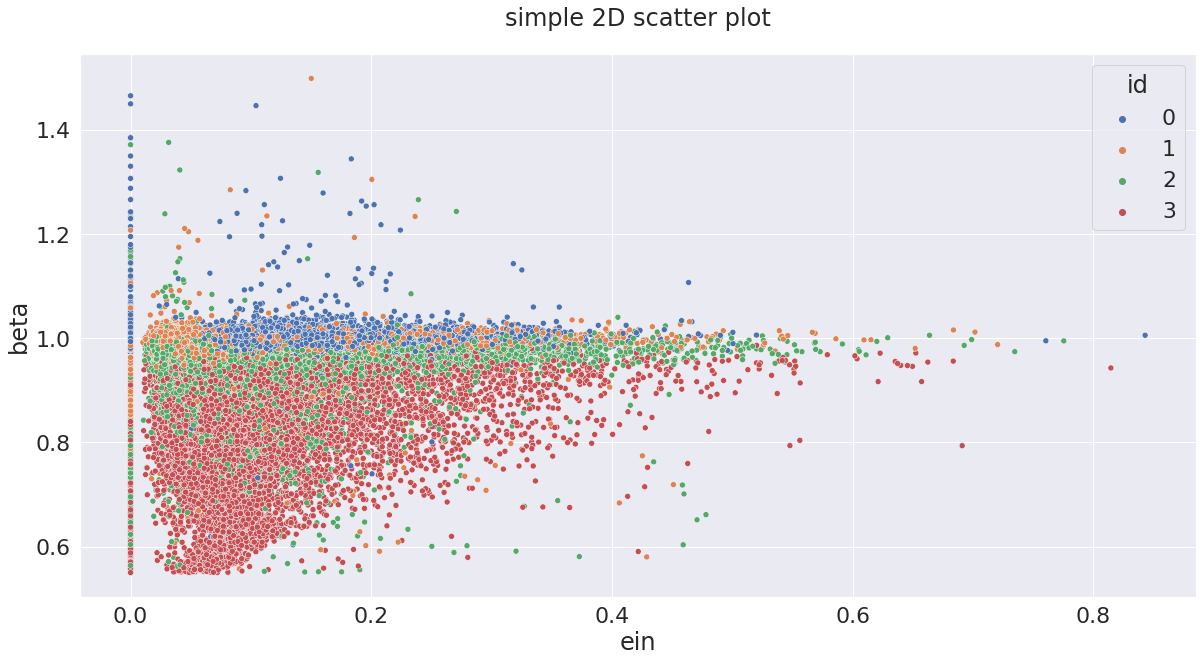

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='ein', y='beta', hue='id', palette="deep")

# I will then use `TensorFlow` and `classical machine learning algorithms` to build a model that allows me to distinguish between four particles (**proton**, **pion**, **kaon**, **positron**). 

## First of all, I split the DataFrame into X (data) and Y (label), where:

In [ ]:
X = df.drop(['id'], axis=1) 
y = df['id']  

## Using a train-test split, I split X and Y into train and test data.


*   Train Dataset: Used to fit model.
*   Test Dataset: Used to evaluate the fit model.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# 1. Classical machine learning algorithms

In [ ]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNeighborsClassifier
**Using X_train and y_train, train a KNeighborsClassifier with default parameters and `n_neighbors=12`.**

In [ ]:
KNClf = KNeighborsClassifier(n_neighbors = 12)  # KNClf= KNeighborsClassifier
KNClf.fit(X_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=12)

**Model Accuracy**

In [ ]:
print('Accuracy of KNeighborsClassifier on train set: {:.3f}' .format(KNClf.score(X_train_scaled, y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.3f}' .format(KNClf.score(X_test_scaled, y_test)))

Accuracy of KNeighborsClassifier on train set: 0.932
Accuracy of KNeighborsClassifier on test set: 0.926


**Accuracy of KNeighborsClassifier on test set: 92.6 %** 

**Model prediction**

In order to show easily the differences between model-based prediction and real values, I create a dataframe.

In [ ]:
Model_Prediction_knn = KNClf.predict(X_test_scaled)
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction_knn} 
dfC = pd.DataFrame(data=d)
dfC.head(15) 

real or true values(y_test)  Model_Prediction
9199                             2                 2
15560                            2                 2
30418                            1                 1
10101                            3                 3
39489                            0                 0
23188                            3                 3
18227                            0                 0
36111                            1                 1
52337                            3                 3
46084                            0                 0
32564                            3                 3
5769                             3                 3
41626                            1                 1
51168                            3                 3
57500                            1                 1

**Is n_neighbors = 12 the best value? Yes, because:**

In [ ]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled, y_train)
    yhat = neigh.predict(X_test_scaled)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.90882303, 0.89779424, 0.91892575, 0.91741034, 0.92465061,
       0.92246169, 0.92372453, 0.92347196, 0.9247348 , 0.92439805,
       0.92523994, 0.9255767 , 0.92498737, 0.92355615])

**To better understand, I visualize previous cell to see better the relationship between Accuracy and Number of Neighbors(K).**

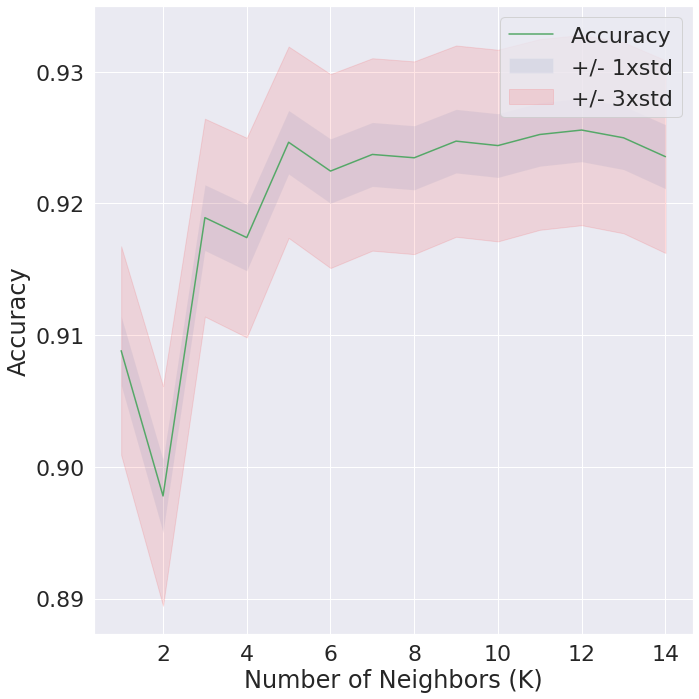

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='red')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:

print("The best accuracy is {:.3f}" .format(mean_acc.max()), "with k =", mean_acc.argmax()+ 1)

The best accuracy is 0.926 with k = 12


In [ ]:
print(classification_report(y_test, Model_Prediction_knn))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2967
           1       0.92      0.85      0.88      2965
           2       0.86      0.95      0.90      3008
           3       0.98      0.95      0.96      2938

    accuracy                           0.93     11878
   macro avg       0.93      0.93      0.93     11878
weighted avg       0.93      0.93      0.93     11878



## DecisionTreeClassifier

**Using X_train and y_train, train a DecisionTreeClassifier with default parameters and `random_state=0`.**

In [ ]:
DTClf = DecisionTreeClassifier(random_state = 0)  #DTClf = Decision Tree Classifier
DTClf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

**Model Accuracy**

In [ ]:
print('Accuracy of Decision Tree classifier on train set: {:.3f}' .format(DTClf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}' .format(DTClf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on train set: 1.000
Accuracy of Decision Tree classifier on test set: 0.916


**Accuracy of Decision Tree classifier on test set: 91.6 %**

**Model prediction**

In [ ]:
Model_Prediction_dt = DTClf.predict(X_test)
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction_dt} 
dfC = pd.DataFrame(data=d)
dfC.head(10) 

real or true values(y_test)  Model_Prediction
9199                             2                 2
15560                            2                 2
30418                            1                 1
10101                            3                 3
39489                            0                 0
23188                            3                 3
18227                            0                 0
36111                            1                 1
52337                            3                 3
46084                            0                 0

## RandomForestClassifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
RFClf = RandomForestClassifier(n_estimators=300, criterion='entropy', min_samples_leaf=2, random_state=0) # RFClf = RandomForestClassifier
RFClf.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       n_estimators=300, random_state=0)

**Model Accuracy**

In [ ]:
print('Accuracy of RandomForestClassifier on train set: {:.3f}' .format(RFClf.score(X_train, y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.3f}' .format(RFClf.score(X_test, y_test)))

Accuracy of RandomForestClassifier on train set: 0.986
Accuracy of RandomForestClassifier on test set: 0.947


**Accuracy of RandomForestClassifier on test set: 94.7 %**

**Model prediction**

In [ ]:
Model_Prediction_rf = RFClf.predict(X_test)
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction_rf} 
dfC = pd.DataFrame(data=d)
dfC.head(10) 

real or true values(y_test)  Model_Prediction
9199                             2                 2
15560                            2                 2
30418                            1                 1
10101                            3                 3
39489                            0                 0
23188                            3                 3
18227                            0                 0
36111                            1                 1
52337                            3                 3
46084                            0                 0

## GradientBoostingClassifier

In [ ]:
GBClf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,
     max_depth=1, random_state=0) # GBClf = GradientBoostingClassifier
GBClf.fit(X_train, y_train)
     

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=300,
                           random_state=0)

**Model Accuracy**

In [ ]:
print('Accuracy of GradientBoostingClassifier on train set: {:.3f}' .format(GBClf.score(X_train, y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.3f}' .format(GBClf.score(X_test, y_test)))

Accuracy of GradientBoostingClassifier on train set: 0.943
Accuracy of GradientBoostingClassifier on test set: 0.941


**Accuracy of GradientBoostingClassifier on test set: 94.1 %**

**Model prediction**

In [ ]:
Model_Prediction_gb = GBClf.predict(X_test)
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction_gb} 
dfC = pd.DataFrame(data=d)
dfC.head(15) 

real or true values(y_test)  Model_Prediction
9199                             2                 2
15560                            2                 2
30418                            1                 1
10101                            3                 3
39489                            0                 0
23188                            3                 3
18227                            0                 0
36111                            1                 1
52337                            3                 3
46084                            0                 0
32564                            3                 3
5769                             3                 3
41626                            1                 1
51168                            3                 3
57500                            1                 1

For the `ROC Curve`, the ideal curve is close to the top left: I want a classifier that produces a high recall while keeping a low false positive rate. Also, for `Precision_Recall`, the closer a curve stays to the upper right corner, the better the classifier. A point at the upper right means high precision and high recall for the same threshold. Here I plot ROC Curves that reflect ROC scores in comparison charts. This provides us with a better understanding of which algorithm works best for our dataset.

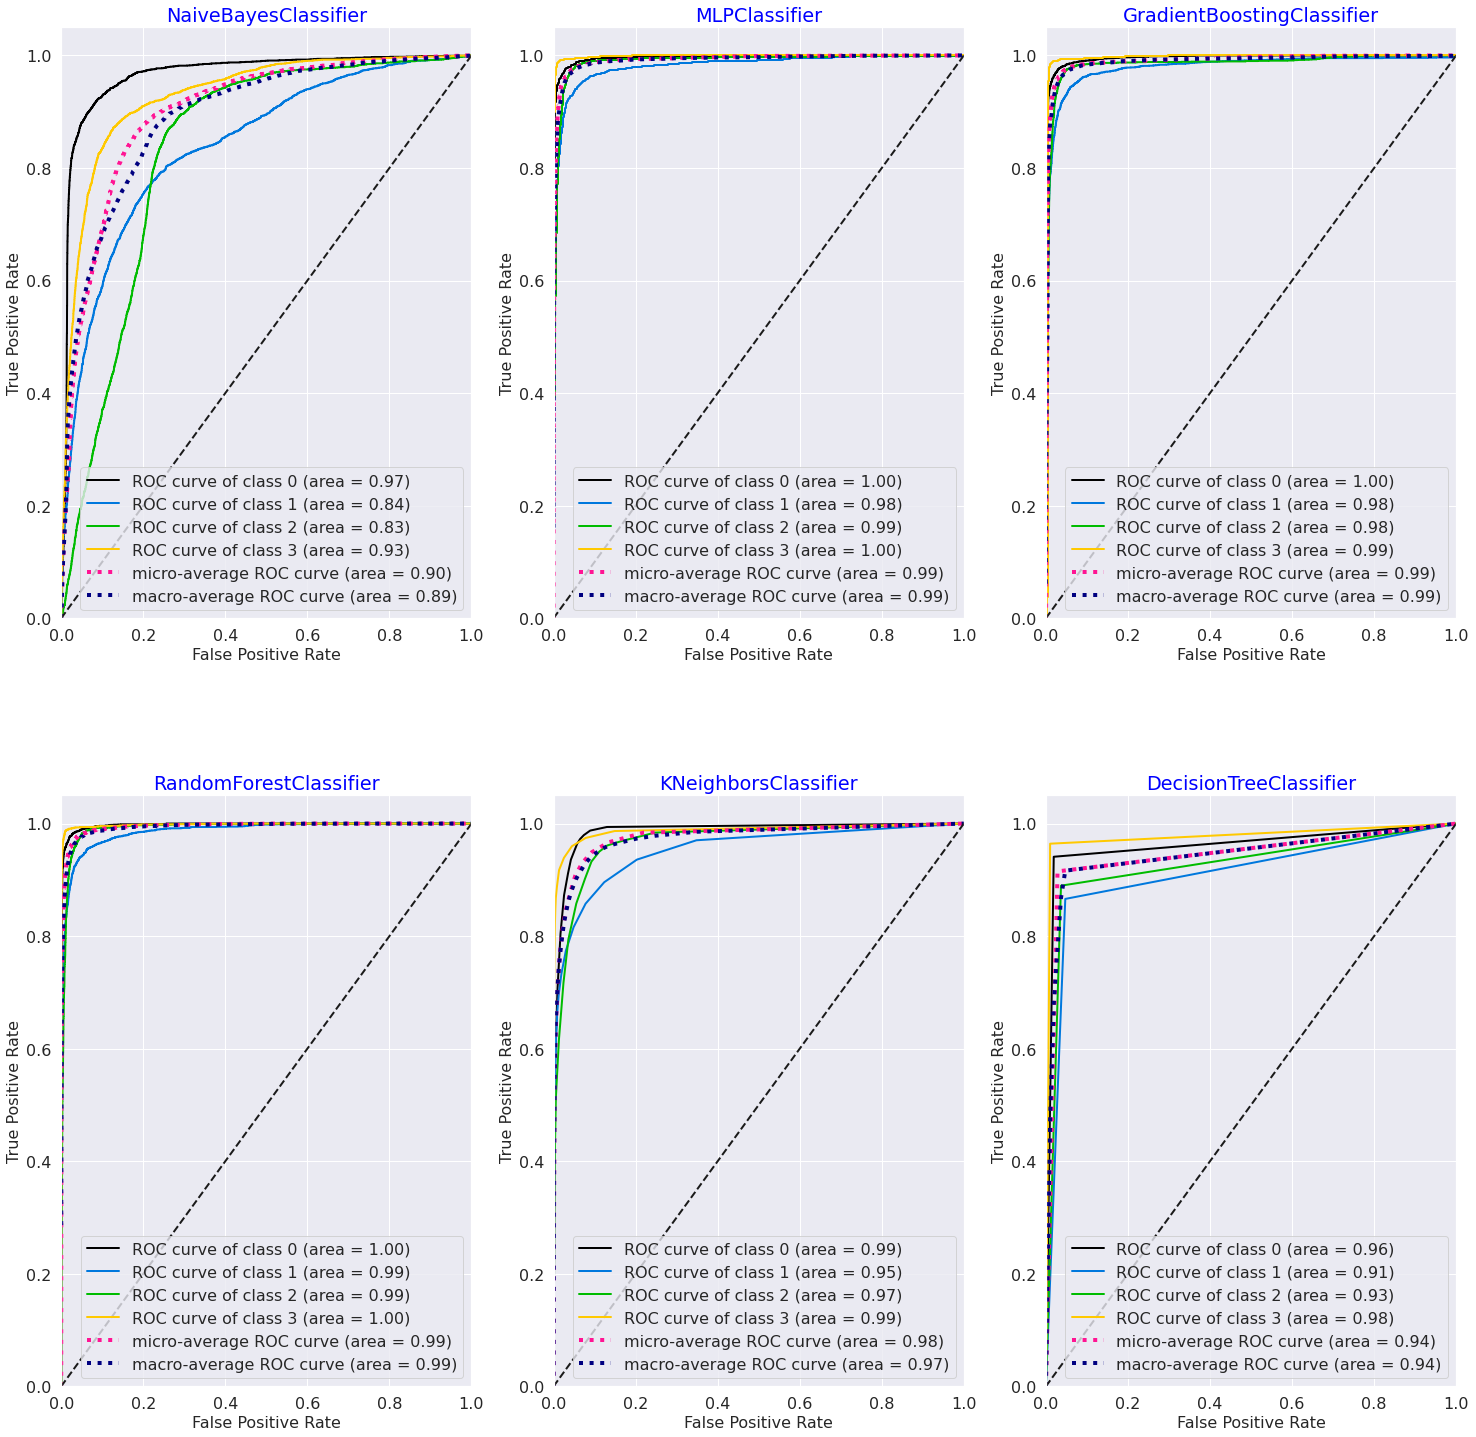

In [ ]:
NBC = GaussianNB() 
NNC = MLPClassifier(hidden_layer_sizes=(300,), activation='relu', random_state=0, max_iter=300) 
GBC = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
RFC = RandomForestClassifier(n_estimators=300, criterion='entropy', min_samples_leaf=2, random_state=0)
KNC = KNeighborsClassifier(n_neighbors = 12) 
DTC = DecisionTreeClassifier()

classifiers = [NBC, NNC, GBC, RFC, KNC, DTC] 
title = ['NaiveBayesClassifier','MLPClassifier','GradientBoostingClassifier','RandomForestClassifier',
         'KNeighborsClassifier', 'DecisionTreeClassifier']

for cls in classifiers:
    cls.fit(X_train, y_train)

plt.figure(figsize=(25,25))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.3)

for i in range(6):

    col, row = i%3,i//3
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), ax=ax, title=title[i])

plt.show()

**Additionally, I plot the `Precision-Recall Curve` and `Confusion Matrix` to determine which algorithms are the best for this dataset in general.**

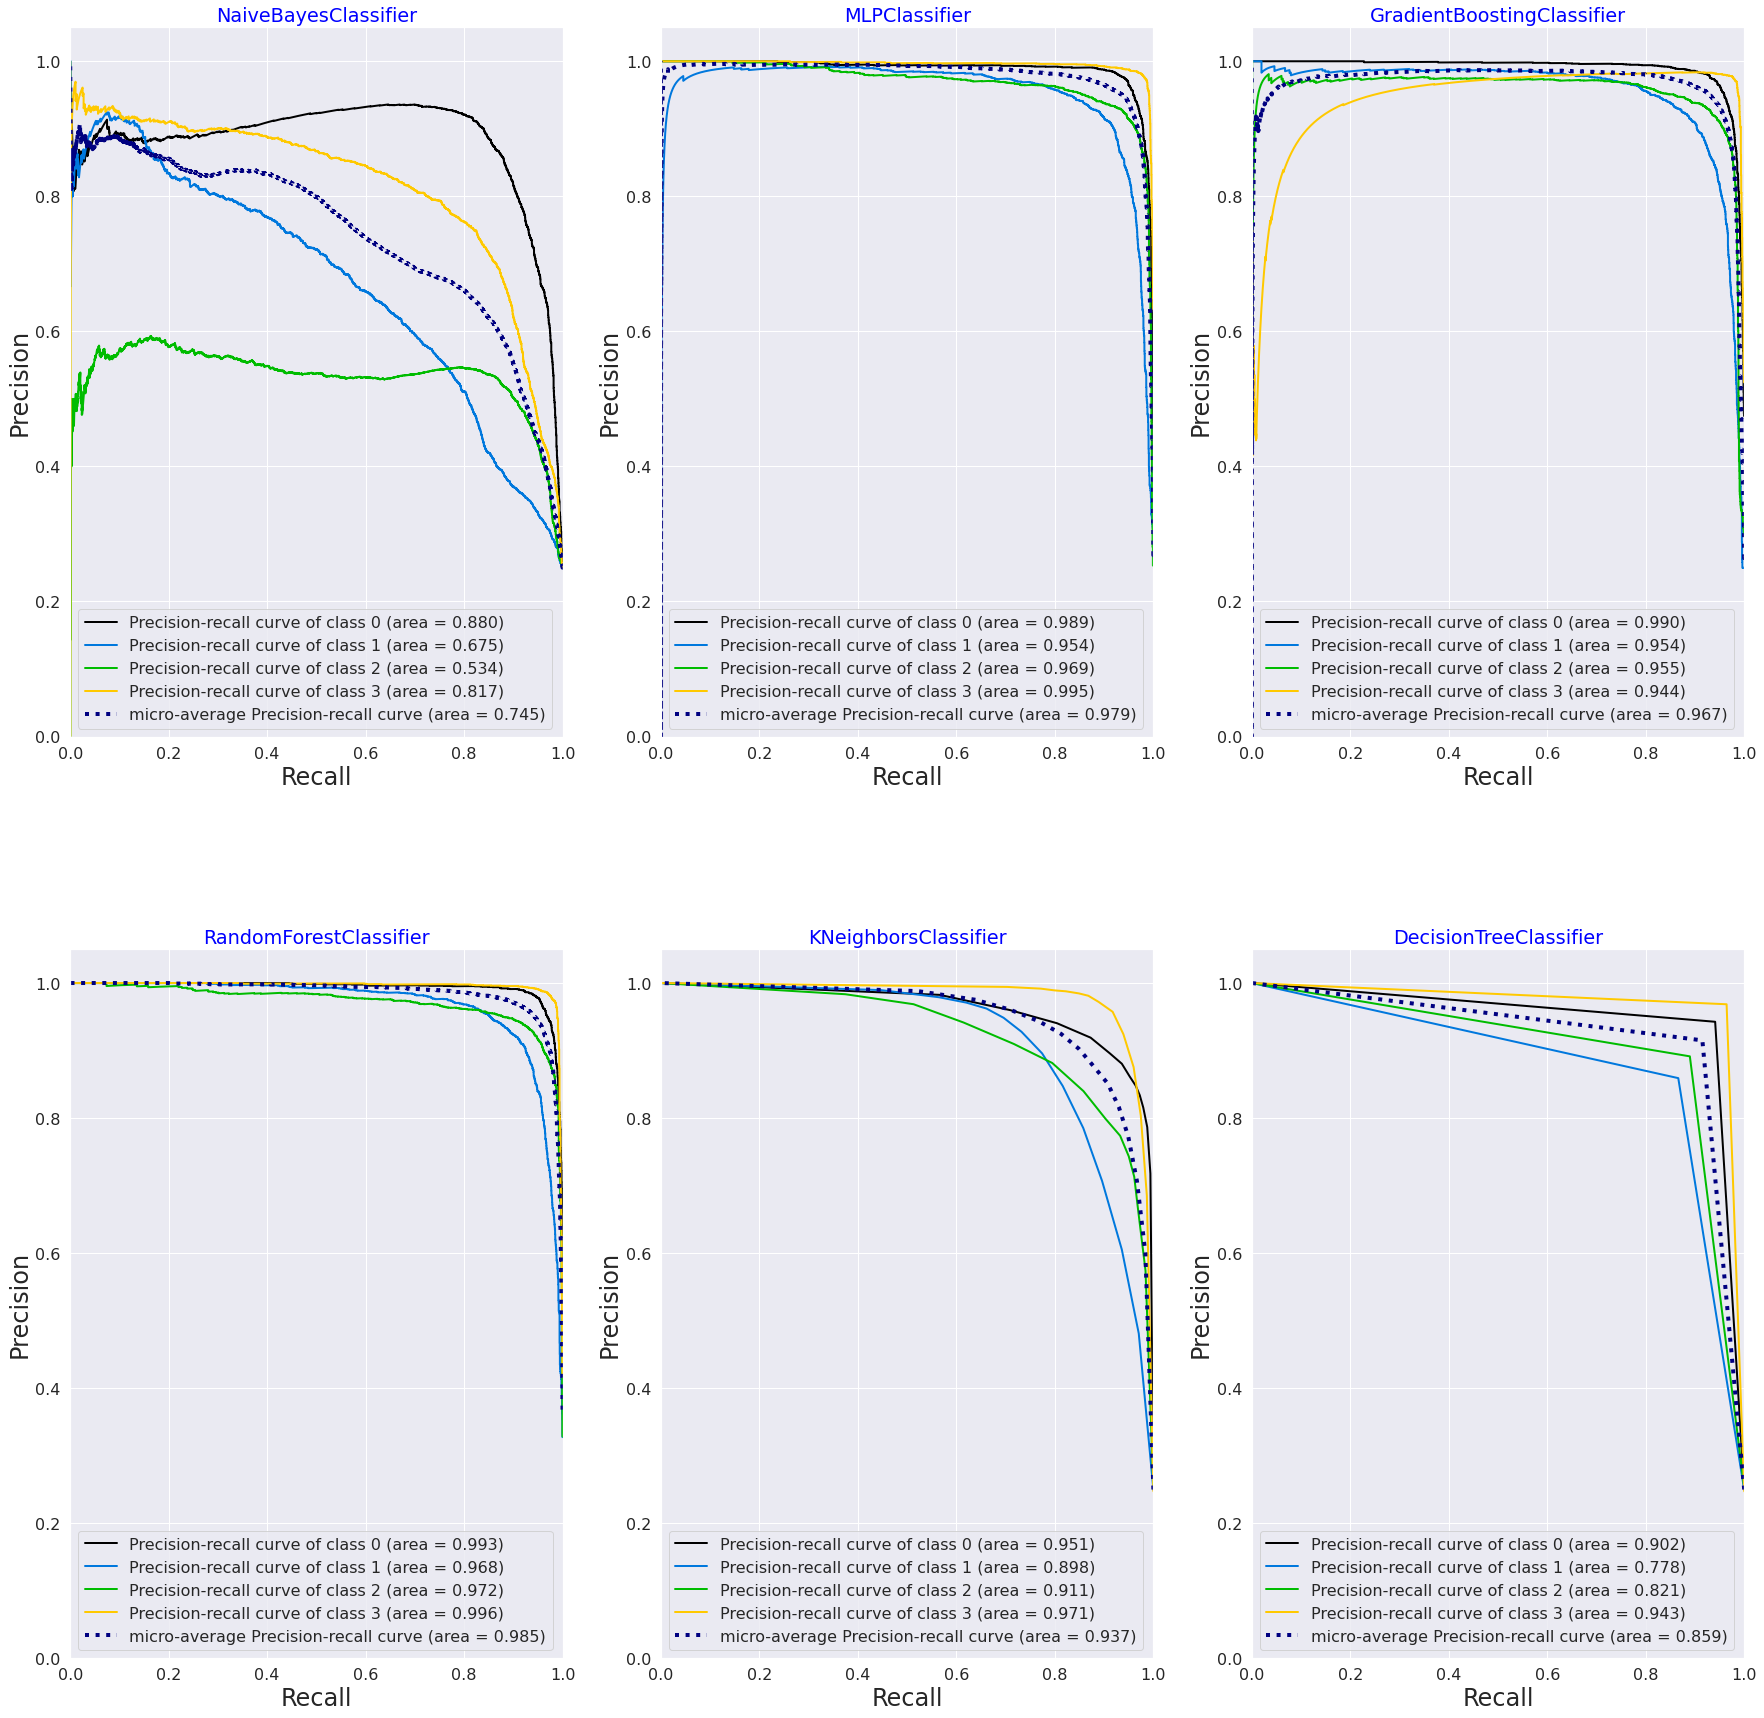

In [ ]:
plt.figure(figsize=(30,30))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.3)

for i in range(6):

    col, row = i%3,i//3
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_precision_recall(y_test, model.predict_proba(X_test), ax=ax, title=title[i])

plt.show()

**Confusion Matrix**

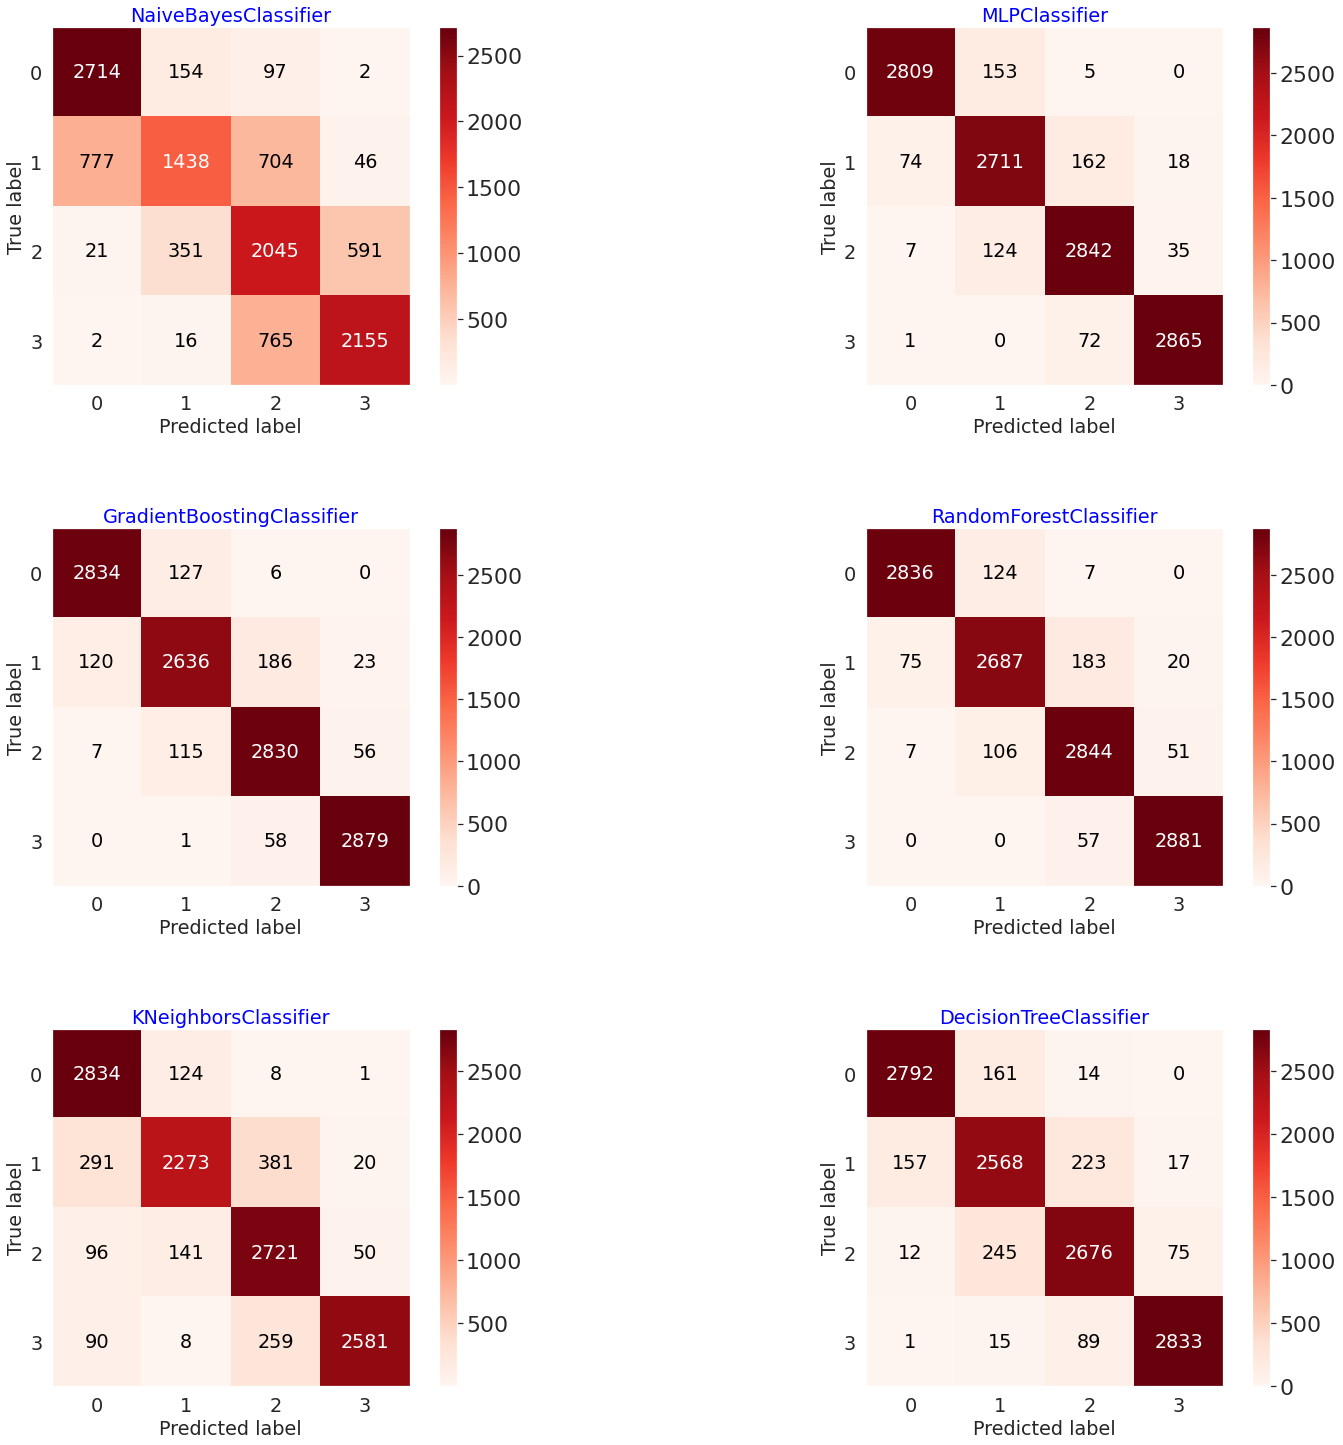

In [ ]:
plt.figure(figsize=(25, 25))
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.4)


for i in range(6):

    col, row = i%2,i//2
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_confusion_matrix(y_test, model.predict(X_test), ax=ax, cmap='Reds', title=title[i], text_fontsize='large')

plt.show()

## 2. TensorFlow
The first thing I do is train a simple Neural Network using TensorFlow, and then plot accuracy and loss graphs on the training and validation datasets to find a balance between the model that is underfitting and one that is overfitting, resulting in a model with a good fit. I first need to convert the train and test data into a TensorFlow tensor.

## To convert DataFrame to a tensor, I use `tf.convert_to_tensor`

In [ ]:
tf.convert_to_tensor(X_train)

<tf.Tensor: shape=(47510, 6), dtype=float64, numpy=
array([[2.35843  , 0.229709 , 0.997905 , 0.       , 0.0390478, 0.283452 ],
       [1.30861  , 0.456258 , 0.803261 , 0.       , 0.0500343, 0.0672007],
       [1.60739  , 0.389978 , 0.859896 , 0.       , 0.121401 , 0.0628061],
       ...,
       [1.23522  , 0.515696 , 0.803715 , 0.       , 0.0670176, 0.0582742],
       [0.538338 , 0.240232 , 0.983386 , 0.       , 0.0944839, 0.       ],
       [3.34112  , 0.216187 , 1.00566  , 0.       , 0.0330053, 0.0580911]])>

In [ ]:
tf.convert_to_tensor(X_test)

<tf.Tensor: shape=(11878, 6), dtype=float64, numpy=
array([[1.22683  , 0.148741 , 0.944075 , 0.       , 0.0321813, 0.0445869],
       [0.635996 , 0.56514  , 0.775943 , 0.       , 0.       , 0.       ],
       [1.18349  , 0.776509 , 1.00243  , 0.       , 0.       , 0.       ],
       ...,
       [0.705119 , 0.159481 , 0.603245 , 0.       , 0.0681621, 0.0558938],
       [0.899977 , 0.295369 , 0.680522 , 0.       , 0.0659648, 0.       ],
       [2.18524  , 0.443165 , 0.997555 , 0.       , 0.035111 , 0.282445 ]])>

## Normalize X_train, X_test

In [ ]:
X_train_scaled = tf.keras.layers.Normalization(axis=-1)
X_train_scaled.adapt(X_train)

In [ ]:
X_test_scaled = tf.keras.layers.Normalization(axis=-1)
X_test_scaled.adapt(X_test)

## Building a simple neural network model
The compile function takes three arguments: optimizer, loss, and metrics.


*   **Optimizer**: These are certain algorithms that are used to change the attributes of the neural network to decrease the loss rate.
*   **Loss**: This is used to compute the quantity that a model should seek to minimize during training.


*   **Metrics**: This is used to judge the performance of the model.





## Model: There are two hidden layers, each with `128 neurons` and an activation function of `sigmoid`, `epochs = 500`.

In [ ]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax) 
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test)) 

Epoch 1/500
1485/1485 [==============================] - 5s 3ms/step - loss: 0.6049 - accuracy: 0.7823 - val_loss: 0.4104 - val_accuracy: 0.8483
Epoch 2/500
1485/1485 [==============================] - 4s 2ms/step - loss: 0.3462 - accuracy: 0.8889 - val_loss: 0.2655 - val_accuracy: 0.9234
Epoch 3/500
1485/1485 [==============================] - 4s 3ms/step - loss: 0.2503 - accuracy: 0.9266 - val_loss: 0.2141 - val_accuracy: 0.9378
Epoch 4/500
1485/1485 [==============================] - 4s 3ms/step - loss: 0.2212 - accuracy: 0.9329 - val_loss: 0.2029 - val_accuracy: 0.9369
Epoch 5/500
1485/1485 [==============================] - 4s 3ms/step - loss: 0.2095 - accuracy: 0.9343 - val_loss: 0.1917 - val_accuracy: 0.9422
Epoch 6/500
1485/1485 [==============================] - 4s 2ms/step - loss: 0.2001 - accuracy: 0.9360 - val_loss: 0.1834 - val_accuracy: 0.9415
Epoch 7/500
1485/1485 [==============================] - 4s 2ms/step - loss: 0.1917 - accuracy: 0.9365 - val_loss: 0.1799 - val_ac

## Evaluating the model
I create plots from the collected history data.


*   A plot of accuracy on the training and validation datasets over training epochs.
*   A plot of loss on the training and validation datasets over training epochs.



372/372 - 1s - loss: 0.2010 - accuracy: 0.9406 - 889ms/epoch - 2ms/step


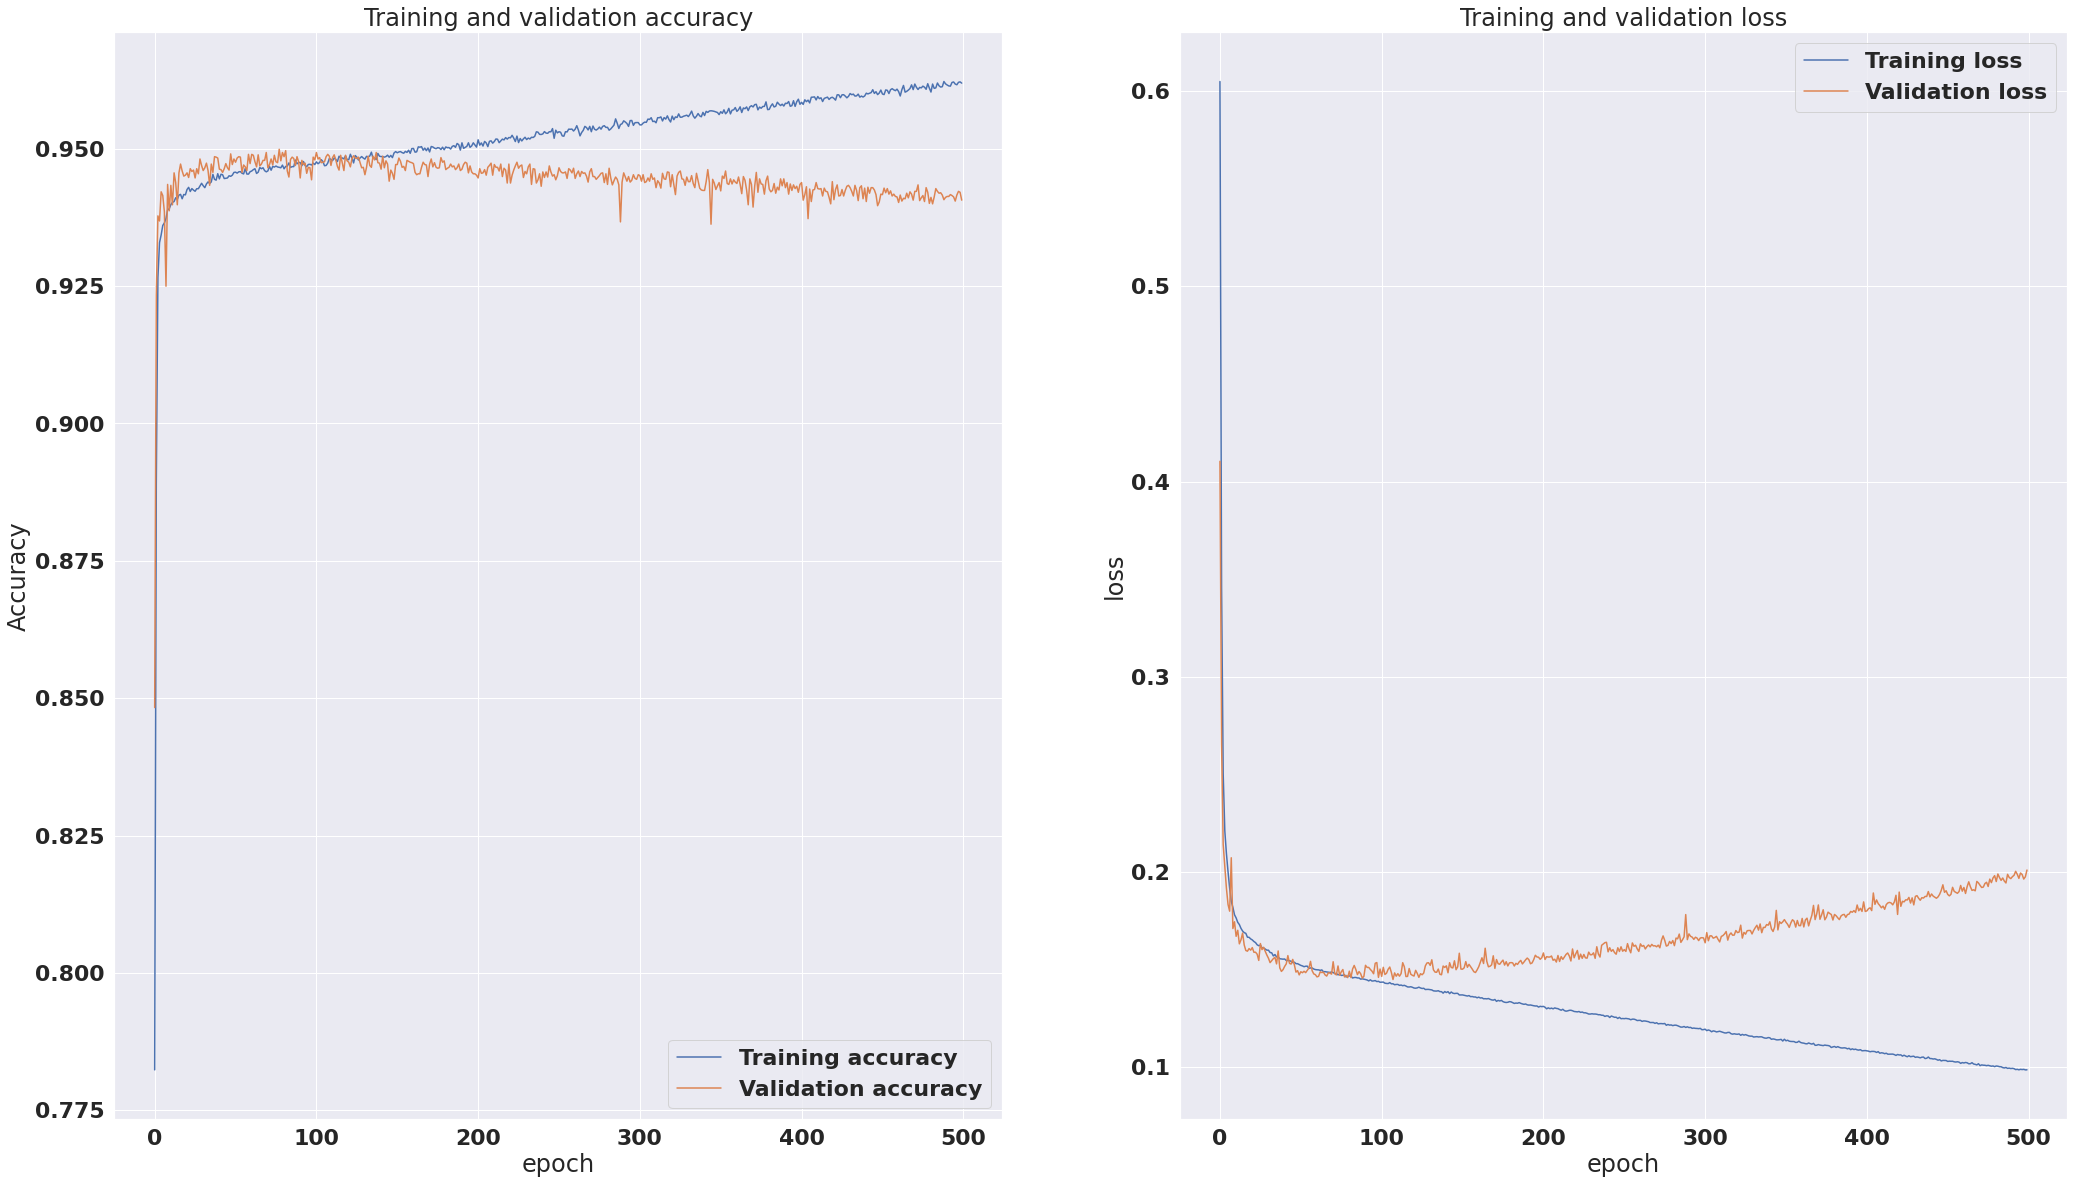

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(35,20))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')
#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

According to the plot of loss, validation loss is decreasing before the 100th epoch, so the model is underfitting. However, after the 100th epoch, validation loss is increasing, which indicates the model is overfitting. At the 100th epoch, when the model is either perfectly fitted or in a local minimum, the neural network model achieved an accuracy of 95%. The goal of Deep Learning training is to find a balance between a model that is underfitting and one that is overfitting(converging), resulting in a model with a good fit. I found an optimum where the change in the slope of loss is around the 100th epoch, as shown above. At that point, the training process can be stopped.